##Titanic Logistic Regression Assignment

Graham Bullard

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("train.csv")

####Using attributes:

- Survived

- Sex

- Age

- Sibsp

- Parch

- Pclass

- Embarked

In [3]:
X = pd.DataFrame()
X['survived'] = df['Survived']
X['sex'] = df['Sex']
X['age'] = df['Age']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['pclass'] = df['Pclass']
X['embarked'] = df['Embarked']

In [4]:
y = X['survived']
X = X.drop(['survived'], axis=1)

In [5]:
X['sex'] = pd.get_dummies(X.sex)['female']
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_1', 'pclass'], axis=1)
X = X.join(pd.get_dummies(df.Pclass, prefix='embarked'))
X = X.drop(['embarked_1', 'embarked'], axis=1)

In [6]:
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [7]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2', C=2)
model.fit(X_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

#Results:

Logistic accuracy is 0.82


---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



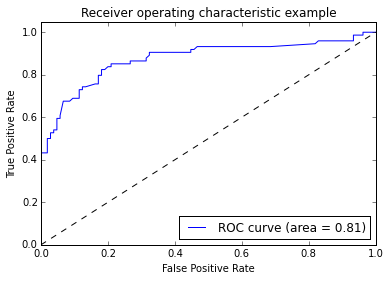

In [8]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()